Male infertility affects around half of all infertile couples. Changes in lifestyle along with environmental factors are described as the main reason for the dramatic decrease in semen quality in last two decades. In this unsupervised clustering analysis, we are predicting men's fertility through lifestyle and environmental factors.

In [1]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plot
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### Data Set Information:

The dataset is available at 
https://archive.ics.uci.edu/ml/datasets/Fertility#


#### Attribute Information:

1. Season in which the analysis was performed. 1) winter, 2) spring, 3) Summer, 4) fall. (-1, -0.33, 0.33, 1) 

2. Age at the time of analysis. 18-36 (0, 1) 

3. Childish diseases (ie , chicken pox, measles, mumps, polio)	1) yes, 2) no. (0, 1) 

4. Accident or serious trauma 1) yes, 2) no. (0, 1) 

5. Surgical intervention 1) yes, 2) no. (0, 1) 

6. High fevers in the last year 1) less than three months ago, 2) more than three months ago, 3) no. (-1, 0, 1) 

7. Frequency of alcohol consumption 1) several times a day, 2) every day, 3) several times a week, 4) once a week, 5) hardly ever or never (0, 1) 

8. Smoking habit 1) never, 2) occasional 3) daily. (-1, 0, 1) 

9. Number of hours spent sitting per day ene-16	(0, 1) 

10. Output: Diagnosis	normal (N), altered (O)	

##### Citation
David Gil, Jose Luis Girela, Joaquin De Juan, M. Jose Gomez-Torres, and 
Magnus Johnsson. Predicting seminal quality with artificial intelligence 
methods. Expert Systems with Applications, 39(16):12564 â€“ 12573, 2012



### Importing Data with Pandas
The first step we’ll take is to read the data in. The data is stored as a comma-separated values, or csv, file, where each row is separated by a new line, and each column by a comma (,).

In order to be able to work with the data in Python, we’ll need to read the csv file into a Pandas DataFrame. A DataFrame is a way to represent and work with tabular data. Tabular data has rows and columns, just like our csv file.

In order to read in the data, we’ll need to use the pandas.read_csv function. This function will take in a csv file and return a DataFrame. The below code will:

* Read final_diagnosis.txt into a DataFrame, and assign the result to df. We'll also name the columns.

In [2]:
df = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\SpermQuality\fertility_Diagnosis.txt")
df.columns = ['Season','Age','Childish_Diseases','Accident','Surgery','High_Fevers',
                           'Alcohol_Consumption','Smoking_Habit','Sitting_Per_Day','Output']

Once we read in a DataFrame, Pandas gives us two methods that make it fast to print out the data. These functions are:

* pandas.DataFrame.head – prints the first N rows of a DataFrame. By default 5.

* pandas.DataFrame.tail – prints the last N rows of a DataFrame. By default 5.

We’ll use the head method to see what’s in df:

In [3]:
df.head()

Season   Age  Childish_Diseases  Accident  Surgery  High_Fevers  \
0   -0.33  0.94                  1         0        1            0   
1   -0.33  0.50                  1         0        0            0   
2   -0.33  0.75                  0         1        1            0   
3   -0.33  0.67                  1         1        0            0   
4   -0.33  0.67                  1         0        1            0   

   Alcohol_Consumption  Smoking_Habit  Sitting_Per_Day Output  
0                  0.8              1             0.31      O  
1                  1.0             -1             0.50      N  
2                  1.0             -1             0.38      N  
3                  0.8             -1             0.50      O  
4                  0.8              0             0.50      N

In [4]:
df.columns

Index(['Season', 'Age', 'Childish_Diseases', 'Accident', 'Surgery',
       'High_Fevers', 'Alcohol_Consumption', 'Smoking_Habit',
       'Sitting_Per_Day', 'Output'],
      dtype='object')

We can also access the pandas.DataFrame.shape property to see row many rows and columns are in df:

In [5]:
print ("Shape of data set:", df.shape, "\n")

Shape of data set: (99, 10) 



In [6]:
print (df.dtypes)

Season                 float64
Age                    float64
Childish_Diseases        int64
Accident                 int64
Surgery                  int64
High_Fevers              int64
Alcohol_Consumption    float64
Smoking_Habit            int64
Sitting_Per_Day        float64
Output                  object
dtype: object


In [7]:
import re
missing_values = []
nonumeric_values = []

print ("DATA SET INFORMATION")
print ("========================\n")

for column in df:
    # Find all the unique feature values
    uniq = df[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("-"* 40)
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(df[column]).sum())
        missing_values.append(s)
    
    
  
#print ("-" * 40)
print ("Features with missing values:\n{}\n\n" .format(missing_values))


DATA SET INFORMATION

'Season' has 4 unique values
[-0.33  1.   -1.    0.33]
----------------------------------------
'Age' has 18 unique values
~~Listing up to 10 unique values~~
[ 0.94  0.5   0.75  0.67  1.    0.64  0.61  0.78  0.81  0.69]
----------------------------------------
'Childish_Diseases' has 2 unique values
[1 0]
----------------------------------------
'Accident' has 2 unique values
[0 1]
----------------------------------------
'Surgery' has 2 unique values
[1 0]
----------------------------------------
'High_Fevers' has 3 unique values
[ 0 -1  1]
----------------------------------------
'Alcohol_Consumption' has 5 unique values
[ 0.8  1.   0.6  0.2  0.4]
----------------------------------------
'Smoking_Habit' has 3 unique values
[ 1 -1  0]
----------------------------------------
'Sitting_Per_Day' has 14 unique values
~~Listing up to 10 unique values~~
[ 0.31  0.5   0.38  0.44  0.25  0.13  0.63  0.19  0.75  1.  ]
----------------------------------------
'Output' has 2

##### Count the frequency that a value occurs in a dataframe column

http://stackoverflow.com/questions/35523635/extract-values-in-pandas-value-counts

In [8]:
for col in df.columns:
    #print("{}".format(col) + "\n" + "{}".format(df[col].value_counts().to_frame()))
    print(df[col].value_counts().to_frame())    
    print("-" * 40)

       Season
-0.33      36
 1.00      31
-1.00      28
 0.33       4
----------------------------------------
      Age
0.67   14
0.56   12
0.75   10
0.53    9
0.78    7
0.58    7
0.50    7
0.69    6
0.64    6
0.81    5
0.61    5
0.94    2
0.72    2
0.92    2
1.00    2
0.89    1
0.83    1
0.86    1
----------------------------------------
   Childish_Diseases
1                 87
0                 12
----------------------------------------
   Accident
0        56
1        43
----------------------------------------
   Surgery
1       50
0       49
----------------------------------------
    High_Fevers
 0           62
 1           28
-1            9
----------------------------------------
     Alcohol_Consumption
1.0                   40
0.8                   38
0.6                   19
0.2                    1
0.4                    1
----------------------------------------
    Smoking_Habit
-1             56
 0             22
 1             21
-----------------------------------

We can see from above that:

The dataset contains 99 instances, which were taken from 99 volunteers who are between 18-36 years old.

The volunteers were asked to fulfill a survey, about life habits and health status.
After being informed they were asked to provide a semen sample after 3 to 6 days of
sexual abstinence, and a semen analysis according to World Health Organization
(WHO) guidance was performed.

9 features are determined to be used in this dataset according to the answers
of the survey, and also 1 output has 2 classes which are symbolized as N and O. N
means normal and O means altered.

The input data is converted into a range of normalization according to the some
rules. These are:

(a) Numerical variables such as age or sitting per day
are normalized onto the interval (0, 1). For instance the sitting per day is as a range between the minimum
1 and the maximum 16. This means that the persons that sits for 16 hours is
normalized to the value 16/16 = 1 where as an individual that sits for 7 hours per day is normalized to the value 7/16 = 0.43 


(b) The variables with only two independent attributes are prearranged with
binary values (0, 1).

(c) The variables with three independent attributes, such as ‘High fevers in the
last year’’ and ‘‘Smoking habit’’ are prearranged using the ternary values (-1, 0, 1). For
example, the last one ‘‘Smoking habit’’ will take -1 for never, 0 represents occasional
and 1 daily.

(d) The variables with four independent attributes, such as ‘‘Season in which
the analysis was performed’’ are prearranged using the four different
and equal distance values (-1,-0.33, 0.33, 1). For instance, ‘‘Season’’ will take -1 for Winter, -0.33 represents Spring, 0.33 is the
value for Sumer and 4 for fall. 

### Plotting variables

In [10]:
df.boxplot(column='Age')

In [49]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A7B2C2080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000025A7B52A748>]], dtype=object)

##### Feature-Output Relationships
The next important relationship to explore is that of each attribute to the Output attribute.

One approach is to visualize the distribution of attributes for data instances for each class and note and differences. You can generate a matrix of histograms for each attribute and one matrix of histograms for each class value, as follows:

Output
N    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
O    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
dtype: object

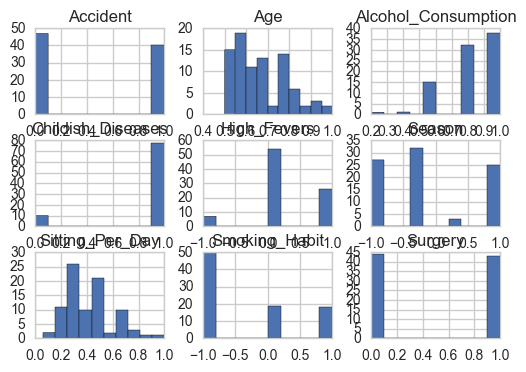

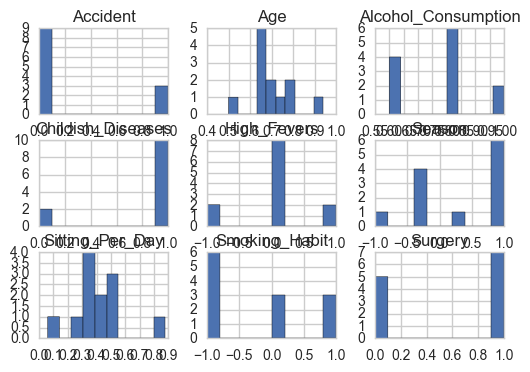

In [54]:
df.groupby('Output').hist()

The data is grouped by the Output attribute (two groups) then a matrix of histograms is created for the attributes is in each group. The result is two images.

##### This helps to point out differences in the distributions between Output like those for the folowing attribute:

1. Age
2. Alcohol_Consumption
3. Sitting_Per_Day

You can better contrast the attribute values for each class on the same plot

In [58]:
df.groupby('Output').Age.hist(alpha=0.8)

Output
N    Axes(0.125,0.125;0.775x0.775)
O    Axes(0.125,0.125;0.775x0.775)
Name: Age, dtype: object

This groups the data by output by only plots the histogram of plas showing the Output value of 0 in green and the Output value of 1 in blue. 

You can see a similar shaped normal distribution, but a shift. This attribute is likely going to be useful to discriminate the Output.

In [56]:
df.groupby('Output').Alcohol_Consumption.hist(alpha=0.4)

Output
N    Axes(0.125,0.125;0.775x0.775)
O    Axes(0.125,0.125;0.775x0.775)
Name: Alcohol_Consumption, dtype: object

Output
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Childish_Diseases, dtype: object

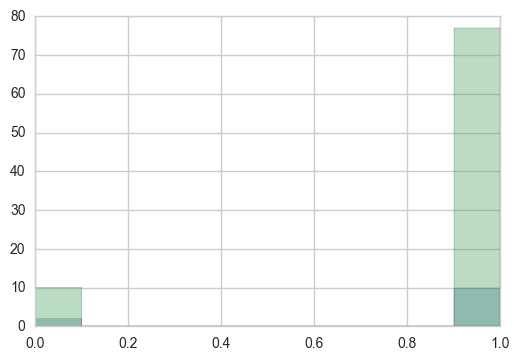

In [188]:
df.groupby('Output').Childish_Diseases.hist(alpha=0.4)

Output
N    Axes(0.125,0.125;0.775x0.775)
O    Axes(0.125,0.125;0.775x0.775)
Name: Sitting_Per_Day, dtype: object

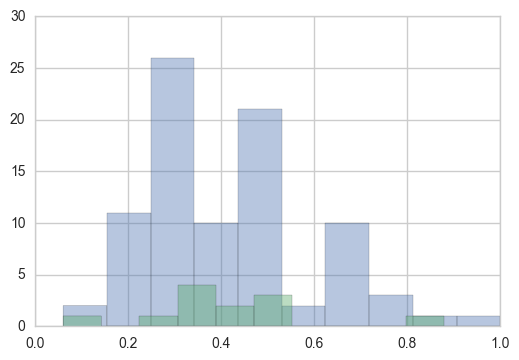

In [59]:
df.groupby('Output').Sitting_Per_Day.hist(alpha=0.4)

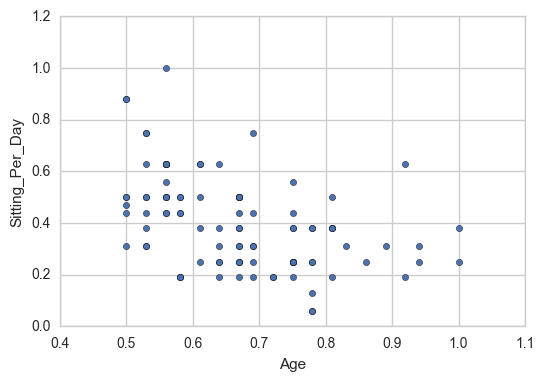

In [11]:
# We'll use this to make a scatterplot of the features.
df.plot(kind="scatter", x="Age", y="Sitting_Per_Day")

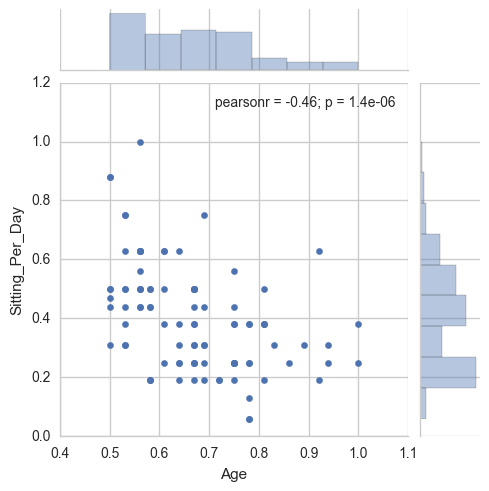

In [12]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="Age", y="Sitting_Per_Day", data=df, size=5)

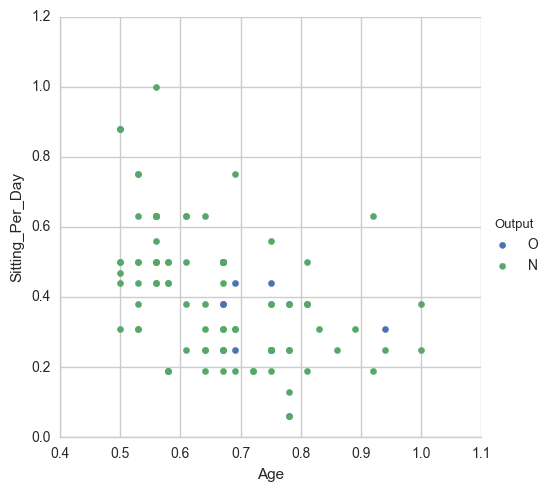

In [14]:
# One piece of information missing in the plots above is what each diagnosis outcome is
# We'll use seaborn's FacetGrid to color the scatterplot by output
sns.FacetGrid(df, hue="Output", size=5) \
   .map(plot.scatter, "Age", "Sitting_Per_Day") \
   .add_legend()

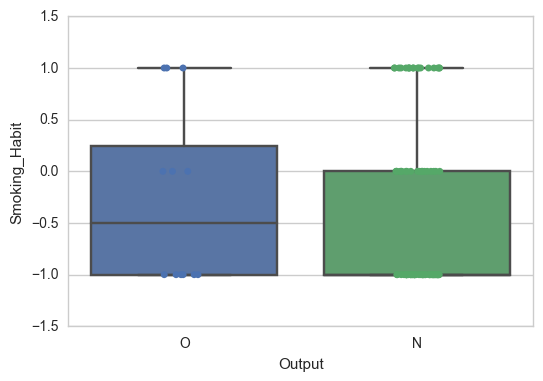

In [23]:
# We can look at an individual feature in Seaborn through a boxplot
ax = sns.boxplot(x="Output", y="Smoking_Habit", data=df)
ax = sns.stripplot(x="Output", y="Smoking_Habit", data=df, jitter=True, edgecolor="gray")

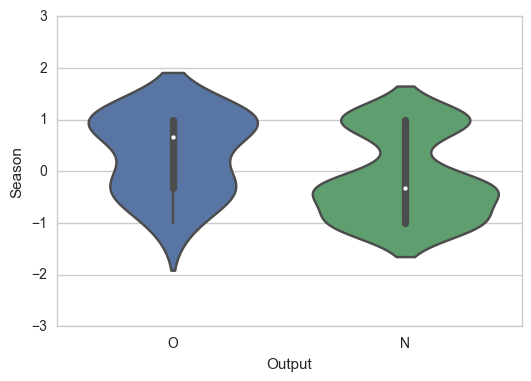

In [34]:

sns.violinplot(x="Output", y="Season", data=df, size=6)


In [35]:
sns.violinplot(x="Output", y="Age", data=df, size=6)


In [36]:
sns.violinplot(x="Output", y="Surgery", data=df, size=6)


In [37]:
sns.violinplot(x="Output", y="High_Fevers", data=df, size=6)


In [38]:
sns.violinplot(x="Output", y="Alcohol_Consumption", data=df, size=6)

In [33]:
sns.violinplot(x="Output", y="Smoking_Habit", data=df, size=6)

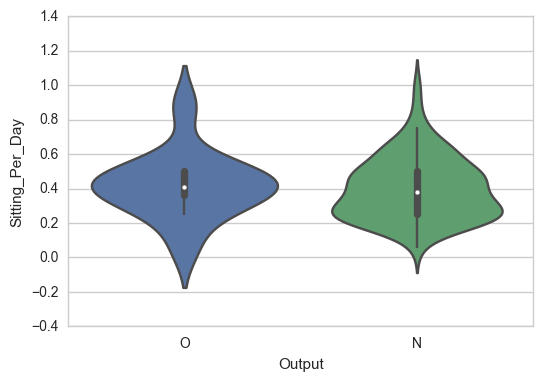

In [40]:
sns.violinplot(x="Output", y="Sitting_Per_Day", data=df, size=6)

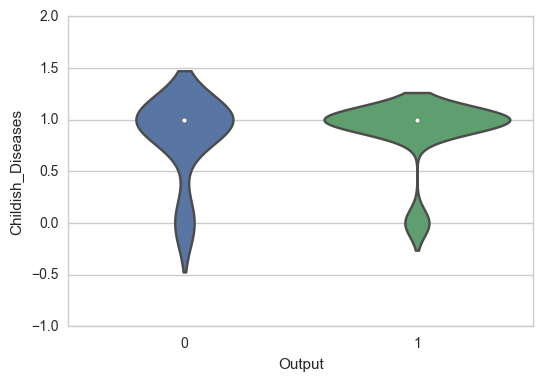

In [189]:
sns.violinplot(x="Output", y="Childish_Diseases", data=df, size=6)

#### Denser regions of the data are fatter, and sparser thiner in a violin plot

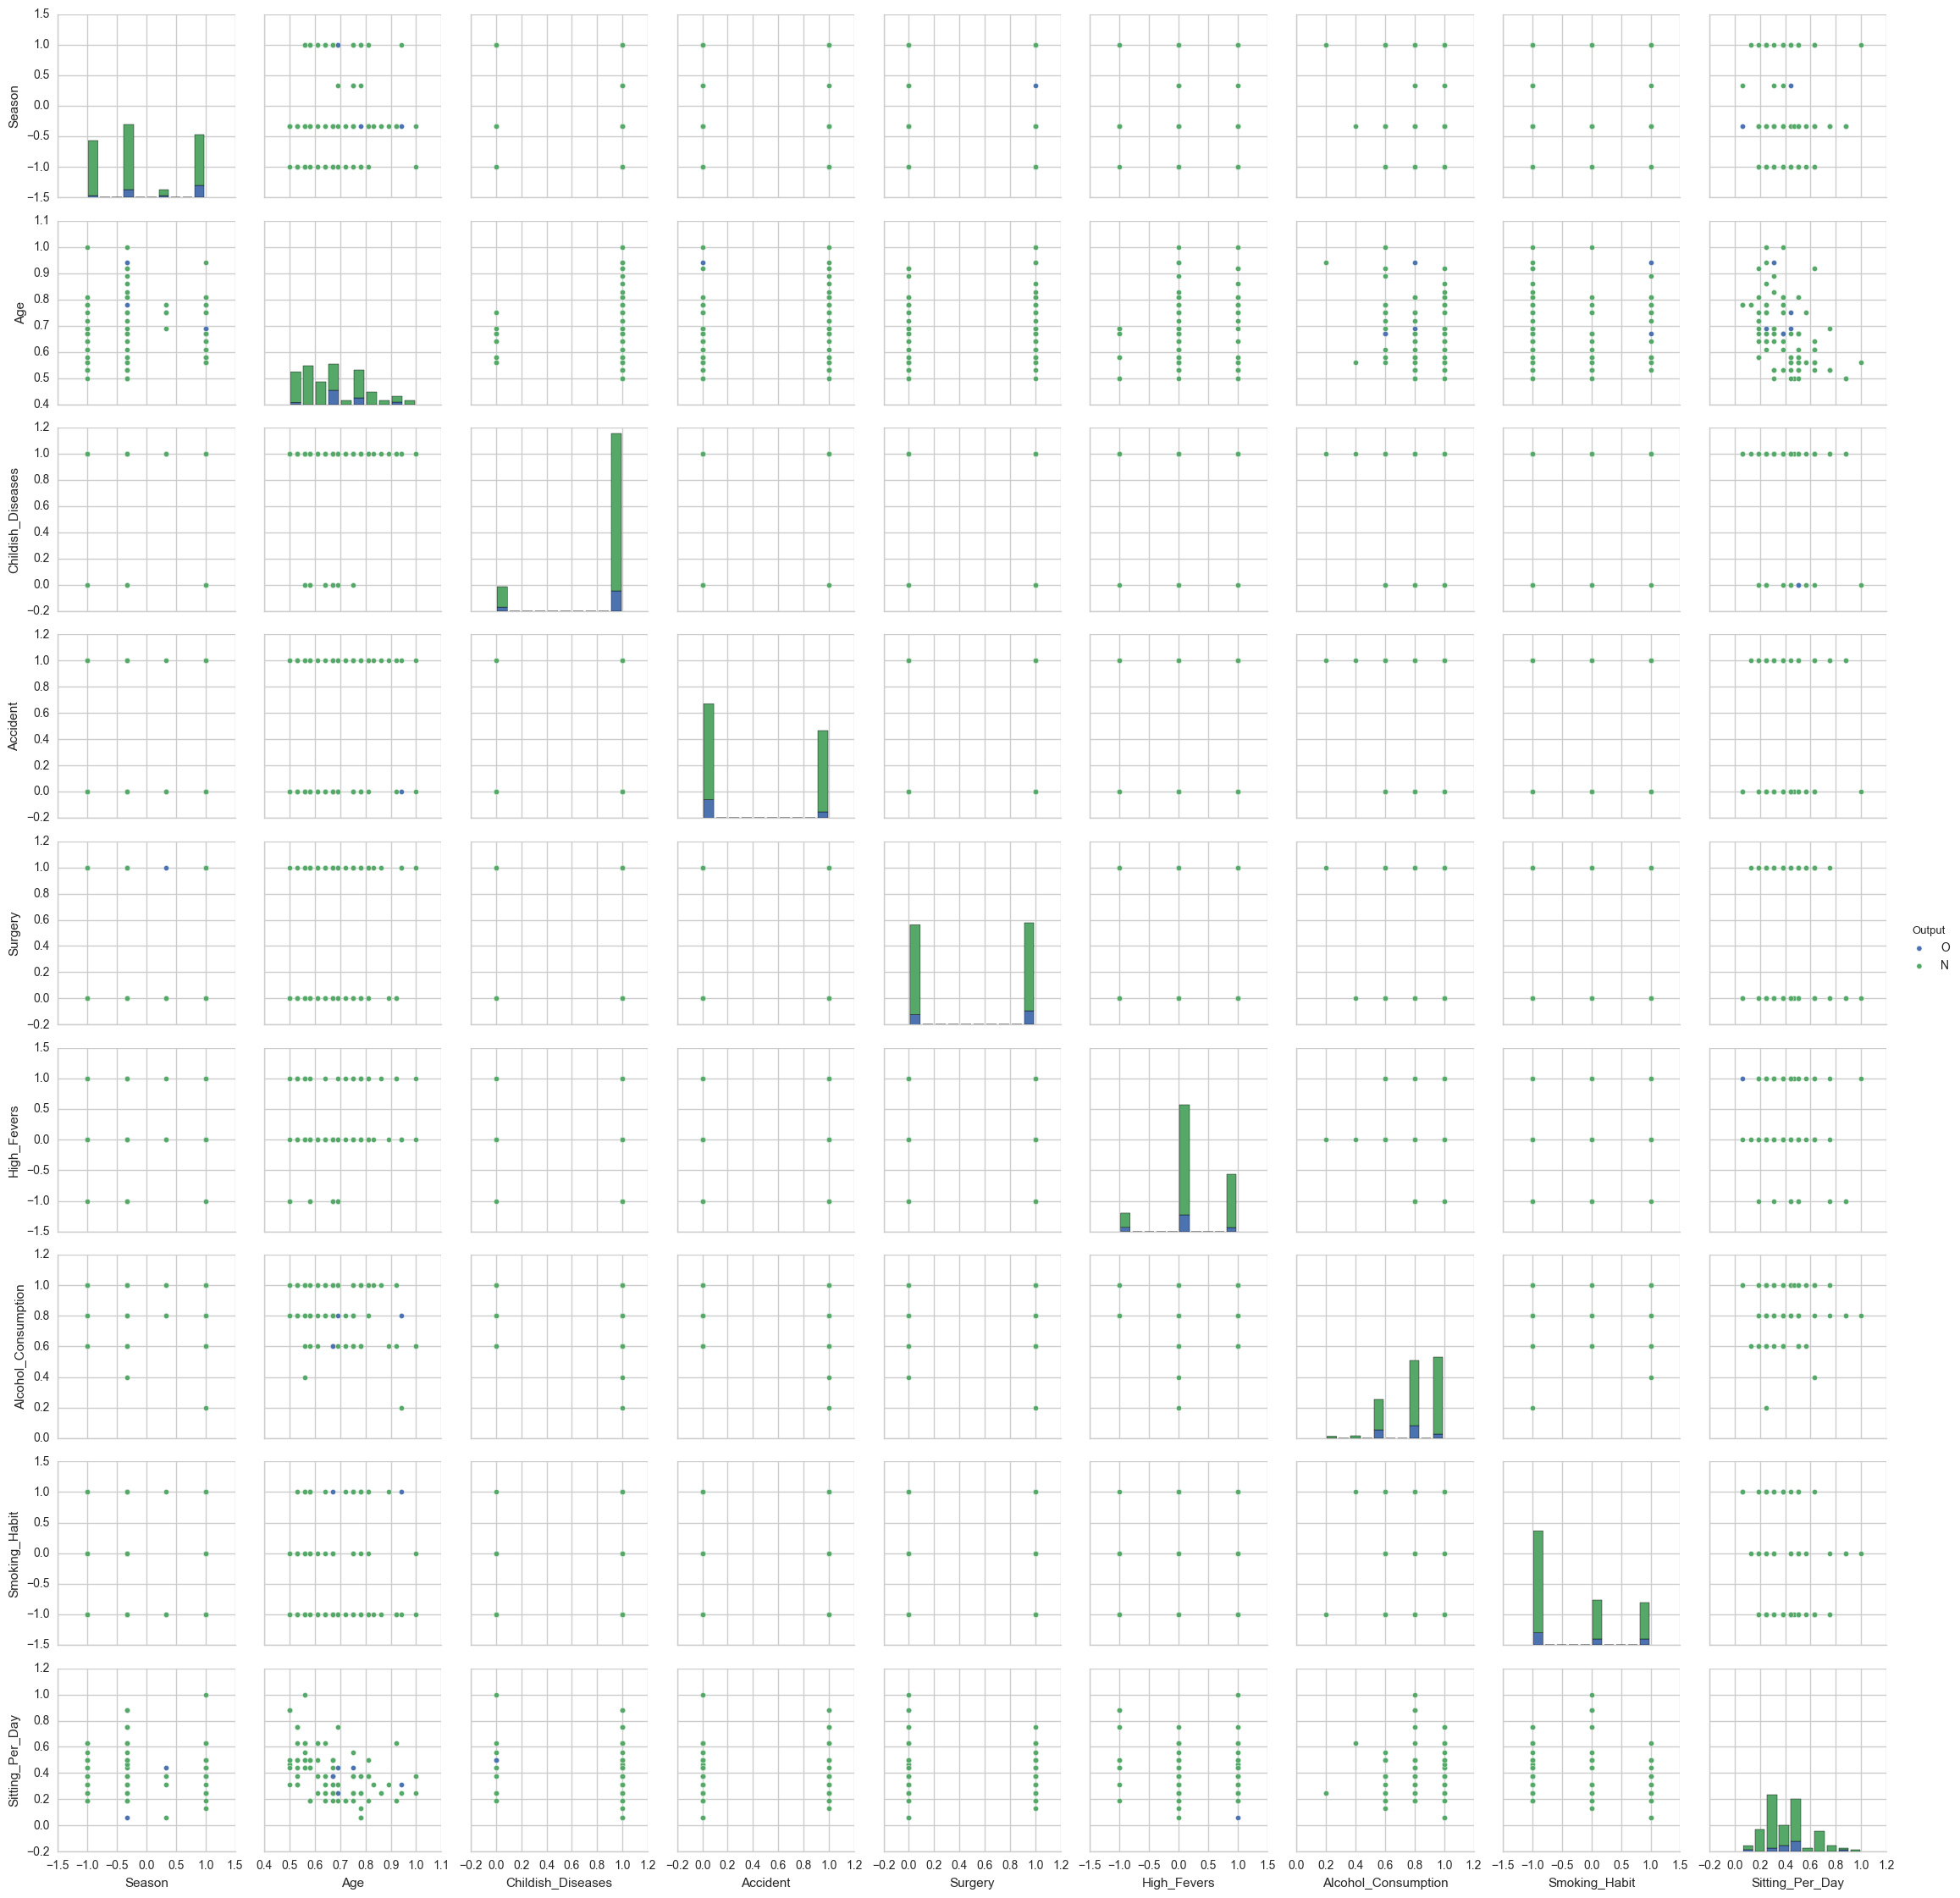

In [27]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
sns.pairplot(df, hue="Output")

In [28]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
df.boxplot(by="Output", figsize=(12, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A65C0F630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000025A63E70E80>]], dtype=object)

Only Age and Sitting_Per_Day have a normal Distribution

In [29]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.tools.plotting import andrews_curves
andrews_curves(df, "Output")

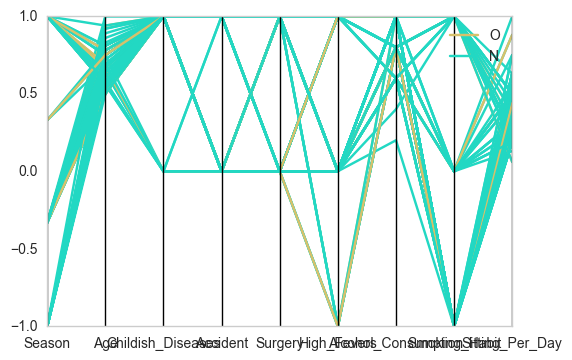

In [30]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(df, "Output")

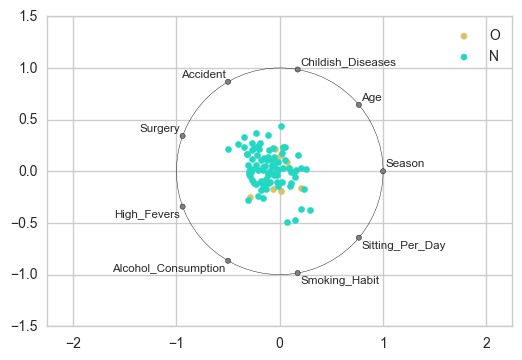

In [31]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(df, "Output")

### Classification
Classification is a data mining function that assigns samples in a dataset to target classes. The models that implement this function are called classifiers. There are two basic steps to using a classifier: training and classification. Training is the process of taking data that is known to belong to specified classes and creating a classifier on the basis of that known data. Classification is the process of taking a classifier built with such a training dataset and running it on unknown data to determine class membership for the unknown samples.

This dataset would generally fall into the domain of <b>Binary Classification Supervised Learning </b> since the training dataset is labelled. And as the dataset suggests it is simply a special case in which there are only two outputs. 

Now there are various algorithms that are used for learning binary classifiers which include:

* Decision Trees
* Neural Networks
* Bayesian Classification
* Support Vector Machines

As the paper has already done Decision Trees, Neural Networks and Support Vector Machines, we will explore other algorithms.

###### Paper Available at :
https://www.researchgate.net/profile/Joaquin_De_Juan/publication/230868076_Predicting_seminal_quality_with_artificial_intelligence_methods/links/09e415058f10cc3081000000.pdf

[Model Evaluation Techniques Everyone Should Know](http://www.datasciencecentral.com/m/blogpost?id=6448529%3ABlogPost%3A389668)

### Model Evaluation

The paper uses prediction accuracy to help in the evaluation of male fertility potential.

The actual output of many binary classification algorithms is a prediction score. The [score](http://docs.aws.amazon.com/machine-learning/latest/dg/binary-classification.html) indicates the system’s certainty that the given observation belongs to the positive class. To make the decision about whether the observation should be classified as positive or negative, as a consumer of this score, you will interpret the score by picking a classification threshold (cut-off) and compare the score against it. Any observations with scores higher than the threshold are then predicted as the positive class and scores lower than the threshold are predicted as the negative class.



##### Encode Output as categorical features as ordered numbers when there is information in the order

We convert the vector of strings in Output into integers:

* Diagnosis normal (N) = 1 
* Diagnosis altered (O)= 0

In [60]:
df = df.replace({"Output" : {"N" : 1, "O" : 0}})

#### Separate the dataset into variables and target

In [62]:
df_train = df.drop('Output', axis=1)
target = df['Output']


We split the data into train set and test set, picking samples at random from the original dataset. We will use the first set to train the classifier and the second one to test the classifier. The function train_test_split can do this for us:

In [112]:
from sklearn.model_selection import train_test_split
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(df_train, df.Output, random_state=0)


The dataset have been split and the size of the test is 40% of the size of the original as specified with the parameter test_size. With this data we can again train the classifier and print its accuracy:

In [113]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train) # train
print (classifier.score(X_test,y_test)) # test

0.8


In this case we have 80% accuracy. The accuracy of a classifier is given by the number of correctly classified samples divided by the total number of samples classified. In other words, it means that it is the proportion of the total number of predictions that were correct.

Another tool to estimate the performance of a classifier is the confusion matrix. In this matrix each column represents the instances in a predicted class, while each row represents the instances in an actual class. Using the module metrics it is pretty easy to compute and print the matrix:

In [114]:
#Example of confusion matrix usage to evaluate the quality of the output of a classifier on the data set. 
from sklearn.metrics import confusion_matrix
print (confusion_matrix(classifier.predict(X_test),y_test))


[[ 0  0]
 [ 5 20]]


In this confusion matrix we can see that all the N diagnosis were classified correctly but, of the 25 actual O diagnosis, the system predicted that <b>5 were N diagnosis</b>. 

If we keep in mind that all the correct guesses are located in the diagonal of the table, it is easy to visually inspect the table for errors, since they are represented by the non-zero values outside of the diagonal.

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

A function that gives us a complete report on the performance of the classifier is also available:

In [115]:
from sklearn.metrics import classification_report
print (classification_report(classifier.predict(X_test), y_test, target_names=['N', 'O']))

             precision    recall  f1-score   support

          N       0.00      0.00      0.00         0
          O       1.00      0.80      0.89        25

avg / total       1.00      0.80      0.89        25



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


However, splitting the data, we reduce the number of samples that can be used for the training, and the results of the evaluation may depend on a particular random choice for the pair (train set, test set). To actually evaluate a classifier and compare it with other ones, we have to use a more sophisticated evaluation model like Cross Validation. The idea behind the model is simple: the data is split into train and test sets several consecutive times and the averaged value of the prediction scores obtained with the different sets is the evaluation of the classifier. This time, sklearn provides us a function to run the model:

In [116]:
from sklearn.cross_validation import cross_val_score
# cross validation with 6 iterations 
scores = cross_val_score(classifier, df_train, target, cv=6)
print (scores)

[ 0.76  0.71  0.88  0.81  0.88  0.88]


As we can see, the output of this implementation is a vector that contains the accuracy obtained with each iteration of the model. We can easily compute the mean accuracy as follows:

In [117]:
from numpy import mean
print (mean(scores))

0.819240196078


###### Clustering
Often we don't have labels attached to the data that tell us the class of the samples; we have to analyze the data in order to group them on the basis of a similarity criteria where groups (or clusters) are sets of similar samples. This kind of analysis is called unsupervised data analysis. One of the most famous clustering tools is the k-means algorithm, which we can run as follows:

In [165]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2,init='random') # initialization
kmeans.fit(df) # actual execution

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

The snippet above runs the algorithm and groups the data in 3 clusters (as specified by the parameter k). Now we can use the model to assign each sample to one of the clusters:

In [166]:
c = kmeans.predict(df)

And we can evaluate the results of clustering, comparing it with the labels that we already have using the completeness and the homogeneity score:

In [167]:
from sklearn.metrics import completeness_score, homogeneity_score
print (completeness_score(target,c))


0.02337503326


In [168]:
print (homogeneity_score(target,c))


0.0411135679437


The completeness score approaches 1 when most of the data points that are members of a given class are elements of the same cluster while the homogeneity score approaches 1 when all the clusters contain almost only data points that are member of a single class.



##### Build the K Means Model
This is the easy part, providing you have the data in the correct format (which we do). Here we only need two lines. First we create the model and specify the number of clusters the model should find (n_clusters=3) next we fit the model to the data.

In [155]:
# K Means Cluster
model = KMeans(n_clusters=2)
model.fit(df_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Next we can view the results. This is the classes that the model decided, remember this is unsupervised and classified these purely based on the data.



In [156]:
# This is what KMeans thought
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1])

###### Visualise the classifier results
Lets plot the actual classes against the predicted classes from the K Means model.



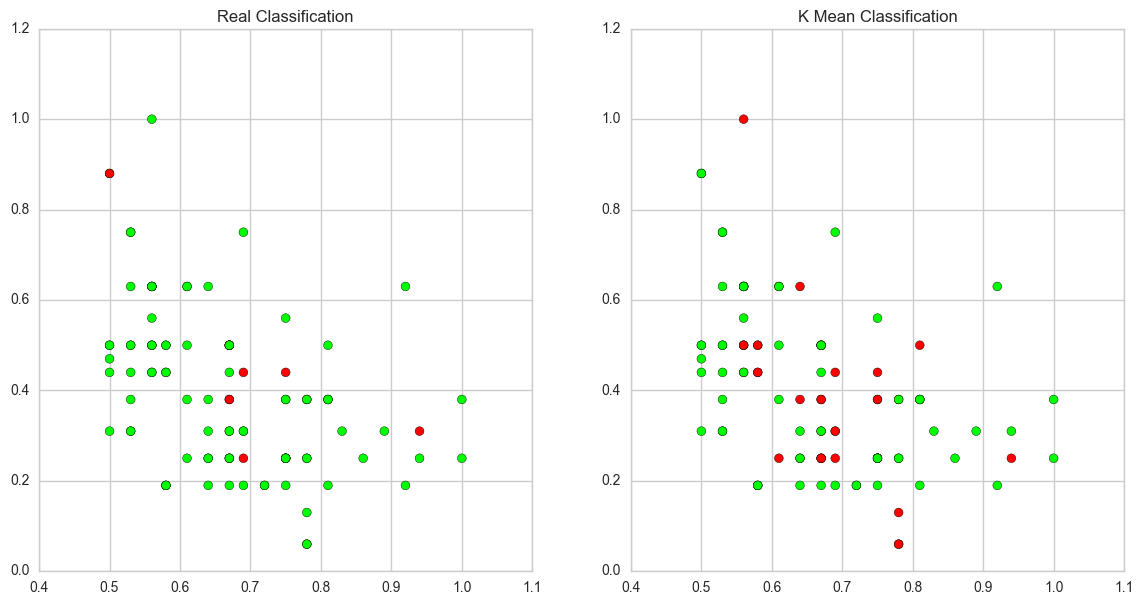

In [183]:
# View the results
# Set the size of the plot
plot.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot the Original Classifications
plot.subplot(1, 2, 1)
plot.scatter(df.Age, df.Sitting_Per_Day, c=colormap[df.Output], s=40)
plot.title('Real Classification')
 
# Plot the Models Classifications
plot.subplot(1, 2, 2)
plot.scatter(df.Age, df.Sitting_Per_Day, c=colormap[model.labels_], s=40)
plot.title('K Mean Classification')

Here we are plotting the Age and Sitting_per-Day, however each plot changes the colors of the points using either 

* c=colormap[df.Output] for the original class and  

* c=colormap[model.labels_] for the predicted classess.



Ignore the colours (at the moment). Because the the model is unsupervised it did not know which label (Output 0, 1) to assign to each Output.

The Fix

Here we are going to change the class labels, we are not changing the any of the classification groups we are simply giving each group the correct number. We need to do this for measuring the performance.

Using this code below we using the np.choose() to assign new values, basically we are changing the 1’s in the predicted values to 0’s and the 0’s to 1’s. By running the two print functions you can see that all we have done is swap the values.

NOTE: your results might be different to mine, if so you will have to figure out which class matches which and adjust the order of the values in the np.choose() function.

In [160]:
# The fix, we convert all the 1s to 0s and 0s to 1s.
predY = np.choose(model.labels_, [0,1]).astype(np.int64)
print (model.labels_)
print (predY)

[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1]
[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1]


Re-plot

Now we can re plot the data as before but using predY instead of model.labels_.

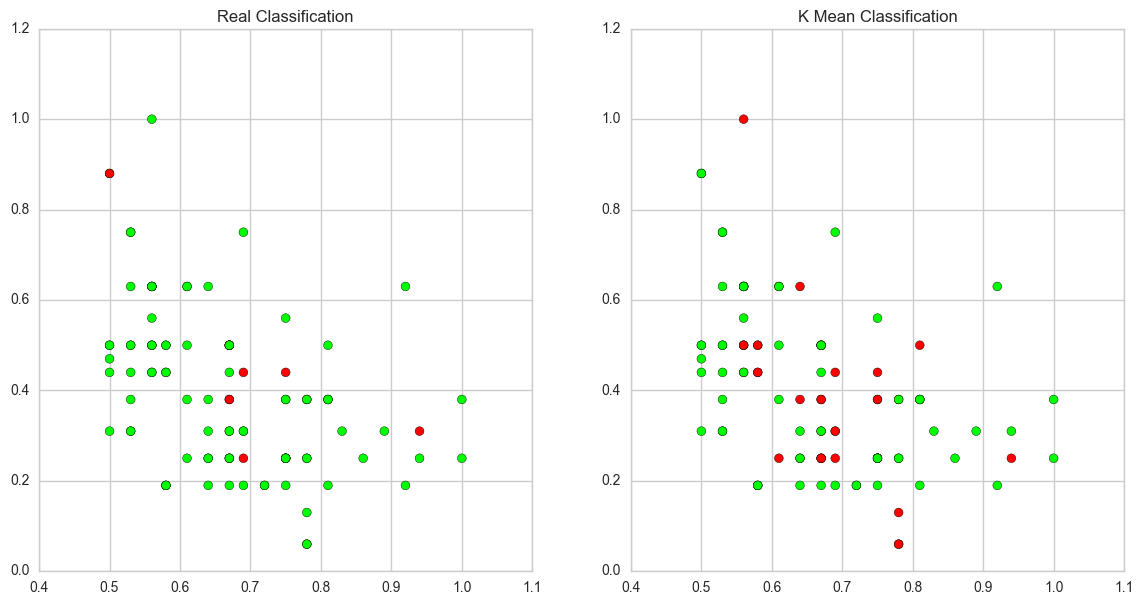

In [161]:
# View the results
# Set the size of the plot
plot.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Orginal
plot.subplot(1, 2, 1)
plot.scatter(df.Age, df.Sitting_Per_Day, c=colormap[df.Output], s=40)
plot.title('Real Classification')
 
# Plot Predicted with corrected values
plot.subplot(1, 2, 2)
plot.scatter(df.Age, df.Sitting_Per_Day, c=colormap[predY], s=40)
plot.title('K Mean Classification')

In [184]:
df.columns

Index(['Season', 'Age', 'Childish_Diseases', 'Accident', 'Surgery',
       'High_Fevers', 'Alcohol_Consumption', 'Smoking_Habit',
       'Sitting_Per_Day', 'Output'],
      dtype='object')

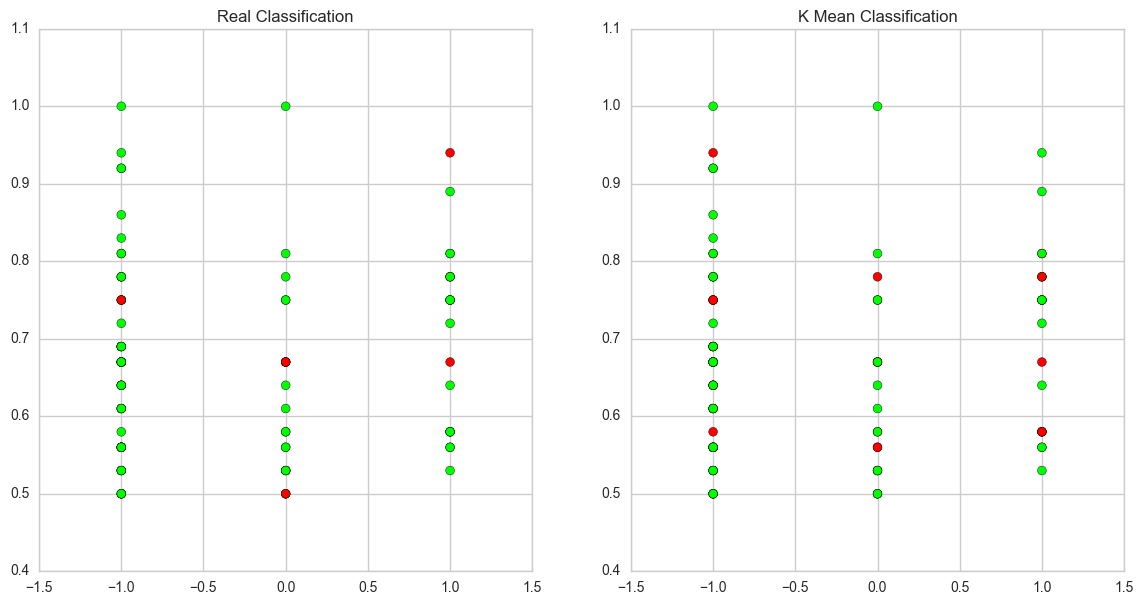

In [186]:
# View the results
# Set the size of the plot
plot.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Orginal
plot.subplot(1, 2, 1)
plot.scatter(df.Smoking_Habit, df.Age, c=colormap[df.Output], s=40)
plot.title('Real Classification')
 
# Plot Predicted with corrected values
plot.subplot(1, 2, 2)
plot.scatter(df.Smoking_Habit, df.Age, c=colormap[predY], s=40)
plot.title('K Mean Classification')

No we can see that the K Means classifier has identified some green have been classed as reds and vice versa.

#### Performance Measures
There are a number of ways in which we can measure a classifiers performance. Here we will calculate the accuracy and also the confusion matrix.

We need to values y which is the true (original) values and predY which are the models values.

In [163]:
#Accuracy
import sklearn.metrics as sm
# Performance Metrics
sm.accuracy_score(target, predY)

0.66666666666666663

Our result is 0.66666666666666663, so we can say that the model has an accuracy of 66.6%. Not bad considering the model was unsupervised.

##### Confusion Matrix

In [164]:
# Confusion Matrix
sm.confusion_matrix(target, predY)

array([[ 7,  5],
       [28, 59]])

Hence, the table [classified](http://stamfordresearch.com/k-means-clustering-in-python/)
can be summarized as the follows:

* correctly classified 5 of Output 0 but misclassified 5 as Output 1
* correctly classified 59 as Ouput 1 but misclassified 28 as Output 1

In [175]:
df[(df['Output'] == 0)].count()

Season                 12
Age                    12
Childish_Diseases      12
Accident               12
Surgery                12
High_Fevers            12
Alcohol_Consumption    12
Smoking_Habit          12
Sitting_Per_Day        12
Output                 12
dtype: int64

In [176]:
df[(df['Output'] == 1)].count()

Season                 87
Age                    87
Childish_Diseases      87
Accident               87
Surgery                87
High_Fevers            87
Alcohol_Consumption    87
Smoking_Habit          87
Sitting_Per_Day        87
Output                 87
dtype: int64

##### Compute the precision
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The best value is 1 and the worst value is 0.

In [177]:
# Precision Score
sm.precision_score(target, predY)

0.921875

###### Compute the F1 score, also known as balanced F-score or F-measure
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. 

In [179]:
# f1_score Score
sm.f1_score(target, predY)

0.7814569536423841

In [182]:
# classification_report
target_names = ['class 0', 'class 1']
print(sm.classification_report(target, predY, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.20      0.58      0.30        12
    class 1       0.92      0.68      0.78        87

avg / total       0.83      0.67      0.72        99



###### Here is a summary of the measures used by the report:

* Precision: the proportion of the predicted positive cases that were correct
* Recall (or also true positive rate): the proportion of positive cases that were correctly identified
* F1-Score: the harmonic mean of precision and recall
* The support is just the number of elements of the given class used for the test. 